In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression

## EDA and Feature Engineering

1. Load the dataset using Pandas.
2. Observe a few rows of the dataset carefully.
3. Check all feature columns present in it.
4. Use info() to check datatypes of all feature columns it also shows various info about the dataset.
5. Check for, if null values present in the dataset. 
6. Drop all missing values.
7. Plot the complete Distribution of Ratings on the pie chart.
8. Encode rating 4s and 5s as '1' i.e. Positive
9. Encode rating 1s and 2s as '0' i.e. Negative
10. Plot Positive, Neutral, and Negative sentiments count on the Pie Chart.
11. Drop rating = 3, as we consider it as a neutral rating.
12. Create a new feature column called 'Sentiment' where rating 4s and 5s are encoded as '1' i.e. Positive and rating 1s and 2s are encoded as '0' i.e. Negative.


In [2]:
# Read the csv file and view a few rows of the data

df = pd.read_csv('Amazon.csv')

df.head()

,Product Name,Brand Name,Price,Rating,Reviews,Review Votes
0,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,I feel so LUCKY to have found this used (phone...,1.0
1,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,"nice phone, nice up grade from my pantach revu...",0.0
2,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,Very pleased,0.0
3,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,It works good but it goes slow sometimes but i...,0.0
4,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,Great phone to replace my lost phone. The only...,0.0


In [3]:
# Use the info() function to check the number of rows, number of columns, column names, number of null
# values and data types of all the columns.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 413840 entries, 0 to 413839
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Product Name  413840 non-null  object 
 1   Brand Name    348669 non-null  object 
 2   Price         407907 non-null  float64
 3   Rating        413840 non-null  int64  
 4   Reviews       413778 non-null  object 
 5   Review Votes  401544 non-null  float64
dtypes: float64(2), int64(1), object(3)
memory usage: 18.9+ MB


In [4]:
# The isnull().sum() function will give us the sum of all Null or NAN or Missing values column-wise

df.isnull().sum()

Product Name        0
Brand Name      65171
Price            5933
Rating              0
Reviews            62
Review Votes    12296
dtype: int64

In [5]:
# Drop missing values

df.dropna(inplace=True)

In [6]:
# Count the occurrences of each rating

rating_counts = df['Rating'].value_counts().sort_index()

rating_counts

1     57535
2     20068
3     26058
4     50421
5    180253
Name: Rating, dtype: int64

In [7]:
# Calculate the total count

total_count = rating_counts.sum()

total_count

334335

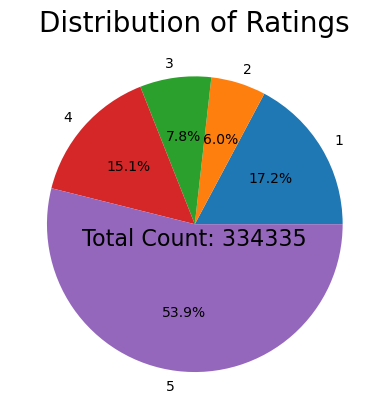

In [8]:
# Plot pie chart for Distribution of Ratings

plt.figure()
plt.pie(rating_counts, labels=rating_counts.index, autopct='%1.1f%%')
plt.title('Distribution of Ratings', fontsize=20)
plt.text(0, -0.1, f'Total Count: {total_count}', ha='center', va='center', fontsize=16)
plt.savefig('Ratings.png')
plt.show()

Let us consider ratings 
1. 1 and 2 as Negative 
2. 3 as Neutral
3. 4 and 5 as Positive

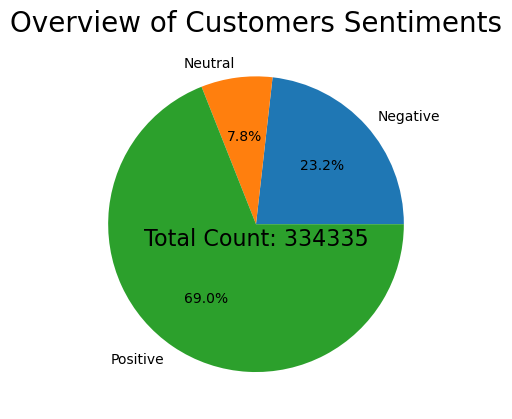

In [9]:
rating_list = [rating_counts.loc[1] + rating_counts.loc[2], rating_counts.loc[3], 
                rating_counts.loc[4] + rating_counts.loc[5]]
   
rating_labels = ['Negative', 'Neutral', 'Positive']

plt.figure()
plt.pie(rating_list, labels=rating_labels, autopct='%1.1f%%')
plt.title('Overview of Customers Sentiments', fontsize=20)
plt.text(0, -0.1, f'Total Count: {total_count}', ha='center', va='center', fontsize=16)
plt.savefig('Sentiments.png')
plt.show()

In [10]:
# We consider rating as neutral so remove it.

df = df[df['Rating'] != 3]

# Encode 4s and 5s as 1 (rated positively)
# Encode 1s and 2s as 0 (rated negatively)

df['Sentiment'] = np.where(df['Rating'] > 3, 1, 0)

df.head()

,Product Name,Brand Name,Price,Rating,Reviews,Review Votes,Sentiment
0,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,I feel so LUCKY to have found this used (phone...,1.0,1
1,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,"nice phone, nice up grade from my pantach revu...",0.0,1
2,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,Very pleased,0.0,1
3,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,It works good but it goes slow sometimes but i...,0.0,1
4,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,Great phone to replace my lost phone. The only...,0.0,1


In [11]:
# Mean more than 0.5 indicates that we have more 1's than 0's i.e. Most ratings are positive

df['Sentiment'].mean()

0.7482686025879323

## Model Fitting using Logistic Regression
1. We want to classify text reviews as Positive or Negative.
2. So, X should contain only the 'Review' feature column which has the user's sentiment information in text format.
3. y should contain only the 'Sentiment' feature column where Positive sentiments are encoded as 1 and Negative sentiments are encoded as 0.
4. Split the dataset into train and test sets.
5. Fit and transform the data into CountVectorizer().
6. CountVectorizer() will convert text into numeric features and will return the document-term matrix.
7. Now, we are ready for Binary Classification.
8. Fit the model using Logistic Regression.
9. Calculate the AUC score.
10. Check the model's performance by predicting any unknown text review.

In [12]:
# Split data into training and test sets

x = df['Reviews']

y = df['Sentiment']

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0)

In [13]:
print('x_train first entry:\n\n', x_train.iloc[0])

x_train first entry:

 I bought a BB Black and was deliveried a White BB.Really is not a serious provider...Next time is better to cancel the order.


# CountVectorizer

In scikit-learn's CountVectorizer, features refer to the individual words or terms in a text corpus that the vectorizer uses to create a numerical representation of the text data. The CountVectorizer is a text preprocessing and feature extraction tool commonly used in natural language processing (NLP) tasks, such as text classification and clustering. It converts a collection of text documents into a matrix of token counts, where each row of the matrix corresponds to a document, and each column corresponds to a unique term or word in the entire corpus.

Here's how it works:

1. **Tokenization**: CountVectorizer first tokenizes the input text data, which means it breaks the text into individual words or terms. These terms are considered features.


2. **Feature Extraction**: For each term, it counts how many times that term appears in each document. These counts are then used to create the feature matrix. Each term becomes a feature, and the count of that term in a document is the value associated with that feature for that document.

By default, scikit-learn's CountVectorizer **does not perform stemming or lemmatization**. It treats words as individual tokens without any linguistic normalization. If you want to apply stemming or lemmatization to your text data, you would typically need to do this as a separate preprocessing step before using CountVectorizer.

Stemming and lemmatization are techniques used in natural language processing to reduce words to their base or root forms. Stemming reduces words to a common stem by removing suffixes, while lemmatization reduces words to their dictionary or lemma form.

In [14]:
# Fit the CountVectorizer to the training data

vect = CountVectorizer().fit(x_train)

In [15]:
# Here features are all words 

# The CountVectorizer in scikit-learn does not, by default, produce unique tokens. Instead, it 
# tokenizes text by splitting it into individual words or n-grams and then counts the frequency of 
# each token in the text.

len(vect.get_feature_names_out())

53216

In [16]:
# View some features or words

vect.get_feature_names_out()[1000:1100]

array(['2048those', '2048x1536', '205', '2050', '2050mah', '206', '207',
       '2070', '20781', '207r', '2089853', '209', '20also', '20am',
       '20awg', '20e', '20fps', '20ft', '20g', '20gb', '20hours', '20hrs',
       '20ish', '20mbps', '20mile', '20min', '20mins', '20minute',
       '20minutes', '20mis', '20mp', '20pm', '20received', '20s', '20th',
       '20us', '20x', '21', '210', '2100', '21000', '21004g', '2100800',
       '2100con', '2100ghz', '2100lte', '2100mah', '2100mhz',
       '2100mhzand', '2100mhzsim', '2100red', '2100s4', '2105',
       '2105775197', '213', '2136', '2136432', '214', '215', '2153843082',
       '216', '2160', '217', '218', '219', '21after', '21mbps', '21mp',
       '21st', '21stwifi', '21x', '21y', '22', '220', '2200', '2200mah',
       '220i', '220v', '2214446', '2215', '222', '2228', '222mb',
       '2236053', '225', '226', '2260', '227', '228', '229',
       '2299803resetting', '22gb', '22hrs', '22nd', '23', '230', '2300',
       '2300mah', '230mb

In [17]:
# transform the documents in the training data to a document-term matrix

# Or we can directly use  x_train_vectorized = vect.fit_transform(x_train) in the begining to

# Learn the vocabulary dictionary and return the document-term matrix.

x_train_vectorized = vect.transform(x_train)

x_train_vectorized

<231207x53216 sparse matrix of type '<class 'numpy.int64'>'
	with 6117776 stored elements in Compressed Sparse Row format>

In [18]:
# Train the model

model = LogisticRegression(max_iter = 1000)

model.fit(x_train_vectorized, y_train)

LogisticRegression(max_iter=1000)

In [19]:
# Calculate AUC Score

x_test_vectorized = vect.transform(x_test)

pred = model.predict(x_test_vectorized)

print('AUC:', roc_auc_score(y_test, pred))

AUC: 0.9305195681511472


In [20]:
# get the feature names as numpy array
feature_names = np.array(vect.get_feature_names_out())

# Sort the coefficients from the model
sorted_coef_index = model.coef_[0].argsort()

# Find the 10 smallest and 10 largest coefficients
# The 10 largest coefficients are being indexed using [:-11:-1] 
# so the list returned is in order of largest to smallest

# words with smallest coefs are related negative review 
# words with highest coefs are related to positive review

print('Smallest Coefs:\n{}\n'.format(feature_names[sorted_coef_index[:10]]))
print('Largest Coefs: \n{}'.format(feature_names[sorted_coef_index[:-11:-1]]))

Smallest Coefs:
['mony' 'worst' 'false' 'worthless' 'horribly' 'messing' 'unsatisfied'
 'blacklist' 'junk' 'superthin']

Largest Coefs: 
['excelent' 'excelente' '4eeeks' 'exelente' 'efficient' 'excellent'
 'loving' 'pleasantly' 'loves' 'mn8k2ll']


In [21]:
# But these reviews are not correctly identified

print(model.predict(vect.transform(['not an issue, phone is working',
                                    'an issue, phone is not working'])))

[0 0]


Since we are **considering only single words** and **not word sequences**, the model is **unable** to **identify difference** between **'issue'** and **'not issue'.**

This **problem** will be **solved** when we will use **ngram_range** in  **CountVectorizer()**

# n-grams

In scikit-learn's CountVectorizer, the **ngram_range** parameter is used to specify the range of n-grams to be extracted from the text data. N-grams are contiguous sequences of n items (words or characters) in a text document. By setting the ngram_range, you can control the size of the n-grams that are considered when vectorizing the text.

The ngram_range parameter takes a tuple with two values: (min_n, max_n). These values define the minimum and maximum n-gram sizes to consider. For example, ngram_range=(1, 2) indicates that **both unigrams (single words) and bigrams (two-word sequences) should be considered** when creating the feature matrix.

## Using n-grams for more accuracy and then fitting the Model
1. In the last case, we are considering only single words and not word sequences.
2. Hence, the model is unable to identify the difference between 'issue' and 'not issue'.
3. This problem will be solved when we will use ngram_range in CountVectorizer().
4. Now, again fit and transform the data into CountVectorizer().
5. Fit the model using Logistic Regression.
6. Calculate the AUC score.
7. Check the model's performance by predicting any unknown text review.


In [22]:
# Fit the CountVectorizer to the training data specifiying a minimum 
# document frequency of 5 and extracting 1-grams and 2-grams

vect = CountVectorizer(min_df=5, ngram_range=(1,2)).fit(x_train)

x_train_vectorized = vect.transform(x_train)

len(vect.get_feature_names_out())

198917

Since both unigrams (single words) and bigrams (two-word sequences) are considered here, the **Number of features has increased a lot** but we are getting **improved AUC Score.**

In [23]:
# Again Train the Model and calculate AUC Score

model = LogisticRegression(max_iter=1000)

model.fit(x_train_vectorized, y_train)

predictions = model.predict(vect.transform(x_test))

print('AUC: ', roc_auc_score(y_test, predictions))

AUC:  0.9671437581005065


In [24]:
# Positive and Negative review words are looking more accurate now

feature_names = np.array(vect.get_feature_names_out())

sorted_coef_index = model.coef_[0].argsort()

print('Smallest Coefs:\n{}\n'.format(feature_names[sorted_coef_index[:10]]))
print('Largest Coefs: \n{}'.format(feature_names[sorted_coef_index[:-11:-1]]))

Smallest Coefs:
['no good' 'worst' 'junk' 'not good' 'not happy' 'horrible' 'garbage'
 'terrible' 'looks ok' 'nope']

Largest Coefs: 
['not bad' 'excelent' 'excelente' 'excellent' 'perfect' 'no problems'
 'exelente' 'awesome' 'no issues' 'great']


In [25]:
# These reviews are now correctly identified

print(model.predict(vect.transform(['not an issue, phone is working',
                                    'an issue, phone is not working'])))

[1 0]
